# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/countingSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/countingSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/countingSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
# 
dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [298]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)


In [299]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

makeinputColumn(dfC6)
makeinputColumn(dfC16)
makeinputColumn(dfC21)
makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
makeinputColumn_readCSV(dfR21)
makeinputColumn_readCSV(dfR23)


             Test name    PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
0      random1-25000-1   5.558350  4.756775            0.380188           72   
1      random1-25000-1   5.314636  4.515320            0.365112           72   
2      random1-25000-1   5.447754  4.662659            0.370605           72   
3      random1-25000-1   5.188416  4.428955            0.356323           72   
4      random1-25000-1   5.204102  4.443542            0.355286           72   
...                ...        ...       ...     ...         ...          ...   
20794  worst-1000000-1  10.212769  8.609131            0.739380           60   
20795  worst-1000000-1  10.300110  8.668518            0.757263           60   
20796  worst-1000000-1  10.474915  8.800232            0.767151           61   
20797  worst-1000000-1  10.169312  8.535522            0.756592           60   
20798  worst-1000000-1  10.342163  8.699158            0.762634           60   

       Time (ms) Input case  
0        

In [300]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
makeSizecolumn_readCSV(dfR21)
makeSizecolumn_readCSV(dfR23)

In [301]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 20799
C16: 20799
C21: 20799
C23: 20799
R6: 41599
R16: 41599
R21: 41599
R23: 41599


### remove outliers

In [302]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    # print(col)
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [303]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
remove_outliers_for_pc(dfC6)
remove_outliers_for_pc(dfC16)
remove_outliers_for_pc(dfC21)
remove_outliers_for_pc(dfC23)
remove_outliers_for_pc(dfR6)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfR21)
remove_outliers_for_pc(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\388745506.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\388745506.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\388745506.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


In [304]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 20799
C16: 20799
C21: 20799
C23: 20799
R6: 41599
R16: 41599
R21: 41599
R23: 41599


In [305]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
meanC21 = mean_of_dataset(dfC21)
meanC23 = mean_of_dataset(dfC23)



C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [306]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [307]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
meanR21 = mean_of_dataset_readCSV(dfR21)
meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [308]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [309]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:21: UserWarning: B

In [310]:
print(meanC6[meanC6["Temperature"]<60])
print(meanC16[meanC16["Temperature"]<60])
print(meanC21[meanC21["Temperature"]<60])
print(meanC23[meanC23["Temperature"]<60])

     PKG (J)   CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
13  4.714976  4.106754    0.34977       57.95  608.042798  25000.0      worst   

    CPU - readCSV  Time - readCSV  Memory - readCSV  
13       2.357062      390.070517          0.227503  
      PKG (J)   CPU (J) Memory (J) Temperature    Time (ms)       Size  \
13   5.021475  4.305814   0.365951       52.39   621.881435    25000.0   
14    5.73528  4.923645    0.41671     58.7475   671.032192    50000.0   
22   8.726017  7.360803   0.647093       59.38   1125.09395   700000.0   
23   9.068158  7.641362   0.673089     59.3025  1182.284825   800000.0   
24  10.067276  8.494973   0.763147      59.705  1272.292925   900000.0   
25   10.29177   8.64845   0.757239     59.2125  1351.388075  1000000.0   

   Input case  CPU - readCSV  Time - readCSV  Memory - readCSV  
13      worst       2.466338      397.938633          0.242570  
14      worst       2.680597      409.878315          0.265688  
22      worst  

# PLOTS

In [311]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [312]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [313]:
listOfDF = [meanC16, meanC21, meanC23, meanC6]
colors = ["red", "green", "blue", "orange"]

In [314]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [315]:
# case = "random"
# x = "Time (ms)"

# plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
# plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
# plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

In [316]:

# plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


In [317]:
# plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

In [318]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

In [319]:
# plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

In [320]:
# plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

In [321]:
# plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

In [322]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

In [323]:
# plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

In [324]:

# plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
# plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


In [325]:

# plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
# plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


In [326]:

# plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
# plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


In [327]:

# plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")


In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.figure(figsize=(10,7))
        plt.scatter(X, y, color=color, label=Label)
        plt.legend(loc='upper left')
        plt.plot(X, y_poly, color="blue",label= "Regression of 2. dg", linewidth=2)
    print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))
        


In [329]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]



In [332]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU - readCSV"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC

In [333]:
for df in listOfDF:
    calcPercent(df)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [334]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best,-0.022315,-4.373005,0.004066,-1.238638,100,-0.018249
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best,-0.032554,-0.801982,0.005697,-1.440153,100,-0.026858
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best,-0.018707,3.899080,0.008749,-0.700248,100,-0.009958
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best,0.019382,6.482725,0.012215,0.637677,100,0.031597
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best,0.019383,5.614648,0.010284,0.478204,100,0.029667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10,1.779062,440.325288,0.286800,84.286524,100,2.065862
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10,2.311401,498.540550,0.361217,84.388112,100,2.672618
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10,2.184332,492.625475,0.375076,84.273780,100,2.559409
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10,1.568930,447.273600,0.333018,83.974746,100,1.901948


In [348]:

def plotStack(df, case, dfName, top, bottom):
    plt.figure(figsize=(10,7))
    cpu = sns.lineplot(df[df["Input case"] == case]["Size"], top, color="red", label="Memory (J) of Full EC")
    cpuLine = cpu.lines[0]
    cpuX = cpuLine.get_xydata()[:, 0]
    cpuY = cpuLine.get_xydata()[:, 1]
    cpu.fill_between(cpuX, cpuY, color="red", alpha=1)
    cpu.margins(x=0, y=0)

    pkg = sns.lineplot(df[df["Input case"] == case]["Size"], bottom, color="green", label="CPU (J) of Full EC")
    pkgLine = pkg.lines[0]
    pkgX = pkgLine.get_xydata()[:, 0]
    pkgY = pkgLine.get_xydata()[:, 1]
    pkg.fill_between(pkgX, pkgY, color="green", alpha=1)
    pkg.margins(x=0, y=0)
    
    #plt.ylim(0,110)
    plt.legend()
    plt.title(f"Counting sort EC distribution between CPU and Memory for {dfName} for {case} case")
    plt.xlabel("Input size")
    plt.ylabel("Joule")
    plt.show()


In [351]:
# for case in ["best", "worst", "random"]:
#         if case != "random":
#             plotStack(meanC16, case, "PC16", df[df["Input case"] == case]["full EC"], df[df["Input case"] == case]["CPU - readCSV"])
#         else :
#             for i in range(1,11):
#                 plotStack(meanC16, case+str(i), "PC16",df[df["Input case"] == case+str(i)]["full EC"], df[df["Input case"] == case+str(i)]["CPU - readCSV"] )

In [362]:
# for case in ["best", "worst"]:

#     plt.plot(meanC16[meanC16["Input case"] == case]["full EC"], meanC16[meanC16["Input case"] == case]["Time - readCSV"], "o")
#     plt.title(f"Full EC vs time for PC16 for {case} case")
#     plt.xlabel("time (ms)")
#     plt.ylabel("Joule")
#     plt.show()

-0.018182096789254632 [0.         0.00197202]
0.15982313097042067


Text(0.5, 1.0, 'Counting sort full EC v time for PC 16 for best case')

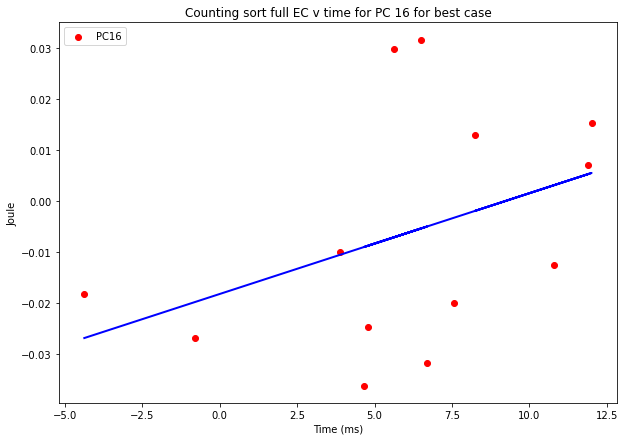

In [376]:
print(polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"], 1,"PC16", "red")[1])
plt.xlabel("Time (ms)")
plt.ylabel("Joule")
plt.title("Counting sort full EC v time for PC 16 for best case")


240.91744130353595 [0.         0.00048286]
644.120218704516 [0.         0.00069965]
worst R2  0.9900250525242253 

best R2  0.9722560706671942 



Text(0, 0.5, 'Time (ms)')

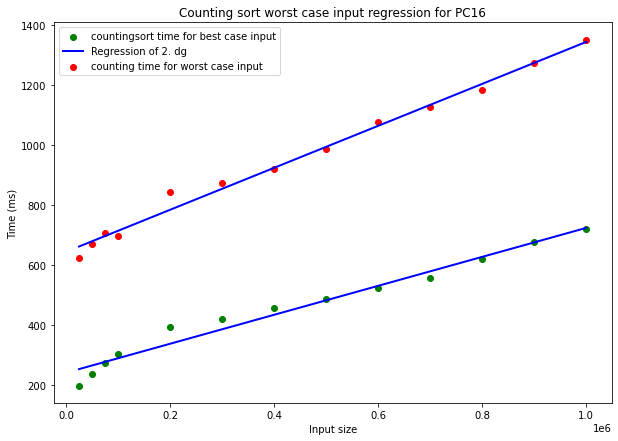

In [340]:
plt.figure(figsize=(10,7))
color = "red"
 #  - readCSV
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time (ms)"],1, "countingsort time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time (ms)"],1, "counting time for worst case input", "red")

print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort worst case input regression for PC16")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")

0.4843292013581415 [ 0.00000000e+00  7.55519426e-03 -1.07833248e-06]
f(x) = 0.00070729 x +  644.5733176424646 
$f(x) = 7.55519426*10^{-3} * x^2 - 1.0783324810^{-6} * x + 0.4843292013581415$